In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [20]:
df = pd.read_csv("scraped_books.csv")

In [21]:
df

,Title,Price,Rating,Availability
0,A Light in the Attic,£51.77,Three,In stock
1,Tipping the Velvet,£53.74,One,In stock
2,Soumission,£50.10,One,In stock
3,Sharp Objects,£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,£54.23,Five,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,£55.53,One,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£57.06,Four,In stock
997,A Spy's Devotion (The Regency Spies of London #1),£16.97,Five,In stock
998,1st to Die (Women's Murder Club #1),£53.98,One,In stock


In [22]:
# Clean and convert price
df['Price'] = df['Price'].str.replace('£', '').astype(float)

# Normalize ratings to numerical values
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
df['Rating_Num'] = df['Rating'].map(rating_map)

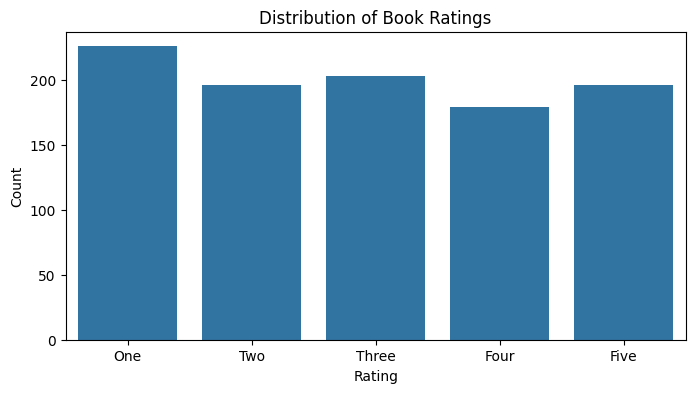

In [23]:
#Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', data=df, order=['One', 'Two', 'Three', 'Four', 'Five'])
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


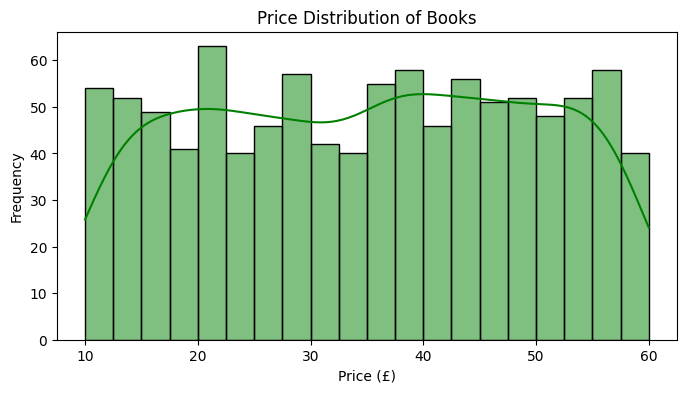

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=20, kde=True, color='green')
plt.title("Price Distribution of Books")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()




/tmp/ipython-input-3793585646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_rating.index, y=avg_price_rating.values, palette='magma')


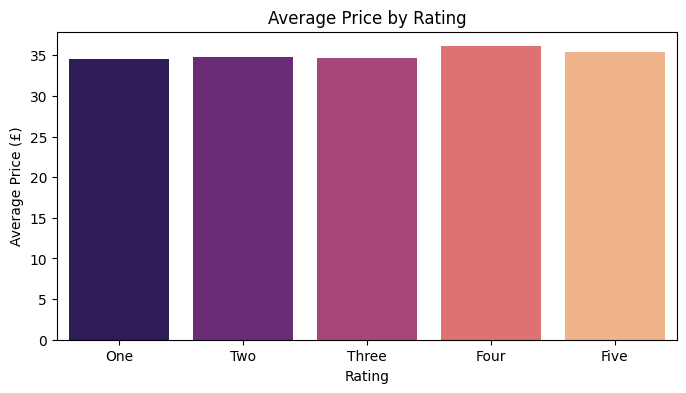

In [41]:
plt.figure(figsize=(8, 4))
avg_price_rating = df.groupby('Rating')['Price'].mean().reindex(['One', 'Two', 'Three', 'Four', 'Five'])
sns.barplot(x=avg_price_rating.index, y=avg_price_rating.values, palette='magma')
plt.title("Average Price by Rating")
plt.ylabel("Average Price (£)")
plt.xlabel("Rating")
plt.show()



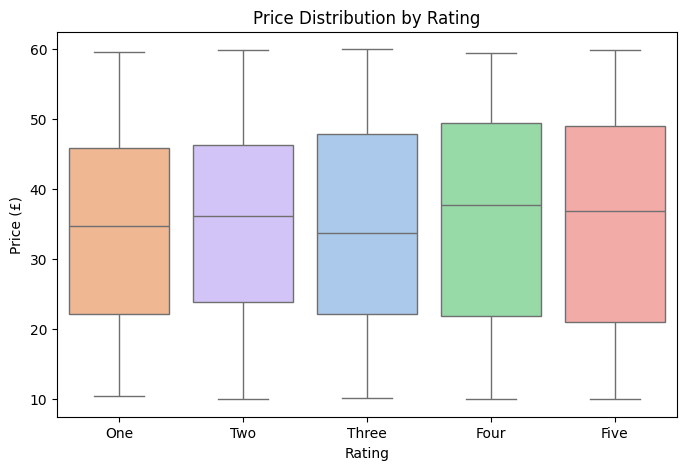

In [30]:
#Boxplot of Price by Rating
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Rating',
    y='Price',
    data=df,
    order=['One', 'Two', 'Three', 'Four', 'Five'],
    hue='Rating',               # 👈 Added hue
    palette='pastel',
    legend=False                # 👈 Hides duplicate legend
)
plt.title("Price Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.show()


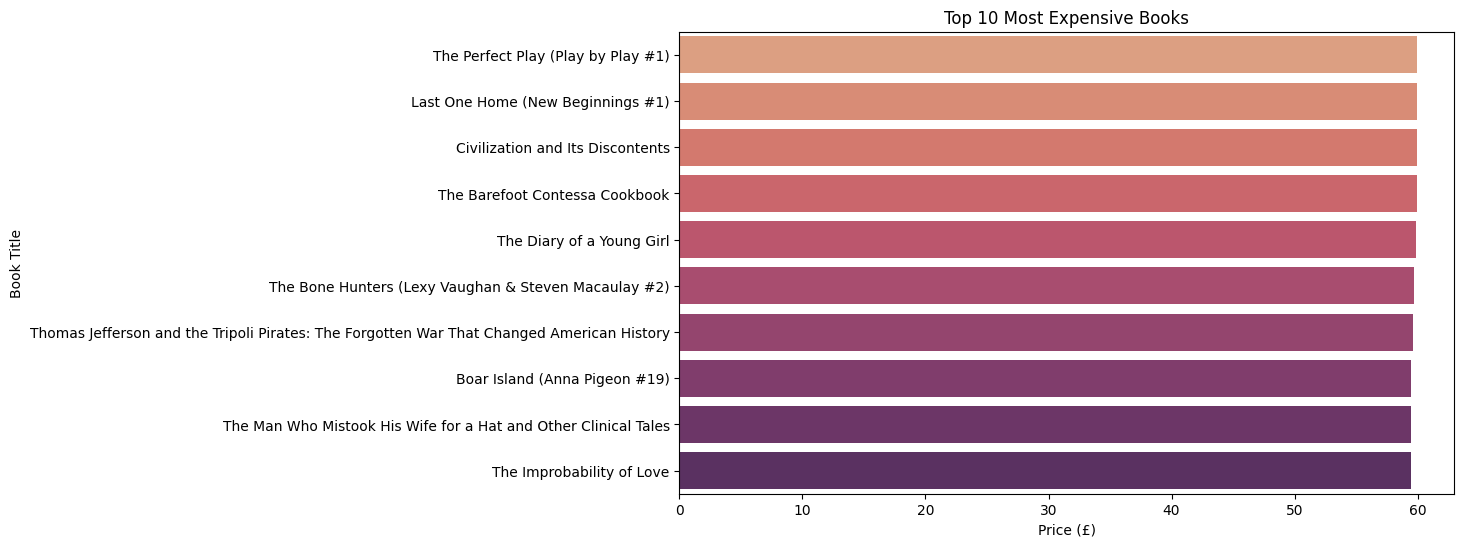

In [29]:
#Top 10 Most Expensive Books
top_expensive = df.sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Title', data=top_expensive, hue='Title', palette='flare', legend=False)
plt.title("Top 10 Most Expensive Books")
plt.xlabel("Price (£)")
plt.ylabel("Book Title")
plt.show()
